# Museum Data Cleaning Project: The Metropolitan Museum of Art Open Access Dataset

## Project Overview

This project focuses on cleaning and validating The Metropolitan Museum of Art's Open Access dataset to prepare it for further analysis and visualization. The Metropolitan Museum's collection contains over 470,000 objects spanning 5,000 years of world culture, making it an excellent dataset for exploring art history through data science.

## Project Steps

1. **Dataset Acquisition**
   - Obtain the MetObjects.csv file from the official Metropolitan Museum GitHub repository (https://github.com/metmuseum/openaccess/)

2. **Data Consistency Evaluation**
   - Investigate consistency issues in at least three features including "Object Name"
   - Document inconsistencies and propose appropriate cleaning strategies

3. **Data Integrity Analysis**
   - Identify and analyze at least two features with potential integrity issues
   - Verify logical relationships between related features
   - Document findings and propose solutions

4. **Data Type Conversion**
   - Convert at least five features to their proper data types:
     - At least one numeric feature
     - At least one categorical feature (ordinal or nominal)
     - At least one datetime feature
   - Document the conversion process and rationale

5. **Outlier Detection**
   - Implement methods to identify outliers in the dataset
   - Visualize and document outliers
   - Propose appropriate handling strategies for outliers

6. **Missing Data Analysis**
   - Detect missing data in at least three features
   - Convert missing data to proper representation
   - Implement advanced imputation techniques for at least one feature
   - Document the imputation process and rationale

7. **Medium Feature Cleaning**
   - Perform specialized cleaning on the "Medium" feature
   - Optimize the feature for potential use in KNN classification
   - Document the cleaning process and transformations

8. **Dimension Data Extraction**
   - Extract physical measurements (width, depth, height in centimeters) from the "Dimensions" feature
   - Convert extracted measurements to standardized formats
   - Document the extraction process and challenges

## Documentation Standards

Throughout this project, I will maintain detailed documentation of:
- The rationale behind each chosen method
- Implementation details and code explanations
- Visualizations to illustrate findings
- Challenges encountered and solutions applied

This project demonstrates practical data cleaning and validation techniques on a real-world, complex cultural heritage dataset.

## I. Dataset and packages loading

First I will need pandas package, so I will import it and at the same time I will load the dataset itself.

In [2]:
import pandas as pd

met = pd.read_csv('MetObjects.csv', low_memory=False)
met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

In [3]:
met_copy = met.copy()

With the info() command I wrote out some basic information about the dataset: number of entries, number of columns, each column data type, NaN count for each column, total count of different data types and memory usage. Let's now take a look at what the first 10 rows of the dataset look like.

In [4]:
met.head(10)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
5,67.265.12,False,False,False,6,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/6,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
6,67.265.13,False,False,False,7,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/7,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Birds|Coins,http://vocab.getty.edu/page/aat/300266506|http...,https://www.wikidata.org/wiki/Q5113|https://ww...
7,67.265.14,False,False,False,8,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/8,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Eagles|Men|Profiles,http://vocab.getty.edu/page/aat/300250049|http...,https://www.wikidata.org/wiki/Q2092297|https:/...
8,67.265.15,False,False,False,9,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/9,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
9,1979.486.3,False,False,False,10,NaN,The American Wing,1979,Coin,Two-and-a-half-dollar Indian Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/10,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


Not all columns are visible here (symbol ...), but now at least I have a basic idea of the contents of the dataset. Since it contains numerical values (float64/int64), I can get information about their count, mean, minimum/maximum, quantiles and standard deviation with the describe() command. This may be useful for further investigation of outliers.

In [5]:
met.describe()

,Object ID,Object Begin Date,Object End Date,Metadata Date
count,484956.000000,484956.000000,484956.000000,0.0
mean,394499.940353,1303.913734,1402.978142,NaN
std,242732.561637,1710.259182,1132.101347,NaN
min,1.000000,-400000.000000,-240000.000000,NaN
25%,212379.750000,1535.000000,1593.000000,NaN
50%,374771.500000,1800.000000,1840.000000,NaN
75%,570971.250000,1891.000000,1905.000000,NaN
max,900748.000000,5000.000000,2870.000000,NaN


As I understand, the 'Metadata Date' column is empty, but I was able to get some information about the others. Now I can finish familiarizing myself with the dataset and start completing the tasks.

## II. Consistency check

Consistency means representation of the same things in the same way. In the context of the Metropolitan Museum, this principle is crucial for maintaining accurate and reliable records across its vast collection of artworks and artifacts. For instance, consistent naming conventions for artists, time periods, and materials enable efficient cataloging and research, while standardized measurement units and dating formats ensure clarity in object descriptions.

I noticed a few columns that have a potential data consistency issue: these are 'Object Name', 'Culture', 'Artist Nationality', 'Medium' and 'Country'.

**Potential issues:** <br>

'Object Name':
- Inconsistent naming conventions (e.g. 'chair' vs 'Chair', plural vs singular forms).
- Abbreviations or typos (e.g., 'TV', 'Television', 'T.V.').
- Special characters or extra spaces (e.g., 'table ' vs 'table').

'Culture':
- Inconsistent granularity (e.g., 'French' vs 'Western European').
- Variations in spelling or formatting (e.g., 'Ancient Greek' vs 'ancient greek').
- Mixing of geographical and cultural terms (e.g., 'Italian' vs 'Renaissance').
- Use of outdated or politically incorrect terms.

'Artist Nationality':
- Inconsistent use of historical vs. modern country names (e.g., 'Prussian' vs 'German').
- Variations in spelling or formatting (e.g., 'USA' vs 'United States' vs 'American').
- Handling of multiple nationalities or changed nationalities.
- Inconsistent handling of disputed territories or colonies.

'Medium':
- Inconsistent level of detail (e.g., 'oil' vs 'oil on canvas').
- Variations in terminology (e.g., 'watercolor' vs 'water-colour').
- Inconsistent ordering of mixed media (e.g., 'oil and acrylic' vs 'acrylic and oil').
- Abbreviations or technical terms (e.g., 'gelatin silver print' vs 'photograph').

'Country':
- Inconsistent use of full names vs. abbreviations (e.g., 'United States' vs 'USA').
- Variations in spelling or formatting (e.g., 'United Kingdom' vs 'U.K.' vs 'Great Britain').
- Use of historical vs. modern country names (e.g., 'Ceylon' vs 'Sri Lanka').
- Inconsistent handling of disputed territories or changes in political boundaries.

I will create a function that checks the consistency of one selected column and apply it to all the above columns. (At first I thought about listing all the unique values from each column to check for consistency, but it would take too long and I might miss something.)

In [6]:
def consistencycheck(column):
    # Check the value counts, unique values, and their lowercase versions for consistency
    print(f'Value counts: \n{column.value_counts()}\n')
    print(f'Value counts (all lowercase): \n{column.str.lower().value_counts()}\n')
    print(f'Number of unique values: {column.nunique()}')
    print(f'Number of unique values (all lowercase): {column.str.lower().nunique()}\n')

In [7]:
columns = ['Object Name', 'Culture', 'Artist Nationality', 'Medium', 'Country']

for col in columns:
    print(f'Consistency check for {col}')
    consistencycheck(met[col])
    print('-' * 50)

Consistency check for Object Name
Value counts: 
Object Name
Print                                      102986
Photograph                                  29451
Drawing                                     26018
Book                                        13397
Kylix fragment                               8926
                                            ...  
Oinochoe in the form of a head of a man         1
Diskos                                          1
Neck-amphora, Tyrrhenian, fragmentary           1
Relief fragments, 12                            1
etching                                         1
Name: count, Length: 28631, dtype: int64

Value counts (all lowercase): 
Object Name
print                                      103073
photograph                                  29451
drawing                                     26021
book                                        13398
kylix fragment                               8942
                                            ...  
kyli

It can be observed that the number of unique values in each column is smaller when we consider lowercase variants. This means that there are indeed identical values in each column that are written differently (all lowercase vs. lower + uppercase). Here are some ideas to clean up this inconsistency I can suggest:
- change all values to lowercase, this will reduce the number of unique values.
- for the Culture, Artist Nationality and Country columns, create dictionaries of consistent names for countries like USA, Britain, India, China and other (often ambigious) values, then using a Python function replace all ambiguous values with values from this dictionary.
- We can also apply the dictionary method to the Object Name column: for example, there are 8942 values of “kylix fragment” and 1 value of “kylix fragments (26)”, we need to turn all plurals into singulars, make consistent abbreviations, and process special characters (in long names like “Oinochoe in the form of a head of a man” we can leave only the first word).

## III. Integrity problems

Data integrity refers to the accuracy, completeness and consistency of data. In other words, data integrity helps ensure that the data remains intact, uncorrupted and reliable. Logical integrity ensures that data remains unchanged while being used in different ways.

In this dataset, I would emphasize the following pairs of features:
- Object Begin Date and Object End Date: these two columns must have a logical relationship in that the end year must not be earlier than the start year.
- Another pair is Object Name and Title (e.g., objects of Vase type cannot have bust or coin in their title).

I could also consider the Artist Begin Date/Artist End Date pair (the end year here should be later than or equal to the beginning year) and the Artist Begin Date/Object Begin Date pair (the second year should be strictly later than the first), but the Artist Begin Year and Artist End Year columns have very poor data quality, and even if I clean them up, they are still incorrect, leading to incorrect results. By checking met.info(), we can notice that both the artist's start and end years are of type “object”.

In [8]:
met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

Now I will create a function that will check for integrity problems in the previously mentioned pairs. For dates, I will check if the year of the end is strictly greater than the year of the beginning; for Object Name/Title, I will check if one is part of the other, while skipping some categories (usually paintings, sculptures, etc., since they don't necessarily have to have their type in the object name).

In [9]:
# Dates integrity check
def dateintegrity(met):
    # Check object begin/end dates
    issues = met[met['Object End Date'] < met['Object Begin Date']]
    # List the issues
    if not issues.empty:
        print(f'Issues with object dates:\n{issues[["Object Begin Date", "Object End Date"]]}\n')    
    else:
        print('No issues found with object start/end date integrity.')

# Object name/title integrity check
def nameintegrity(met):
    # Skip list for the items that should not have their name/type in the title
    skip_names = ['watercolor', 'painting', 'drawing', 'sculpture', 'bust', 'plaque', 'figure', 'miniature', 'print']

    def check_row(row):
        object_name = row['Object Name']
        title = row['Title']

        # Check if object name/title is NaN/non-string, skip these rows
        if not isinstance(object_name, str) or not isinstance(title, str):
            return False
        
        # Lowercase for consistency
        object_name = object_name.lower()
        title = title.lower()

        # Check if the object name is in the skip list
        if any(name in object_name for name in skip_names):
            return False
        
        # Check if the object name is part of the title
        if object_name in title:
            return False
        
        # Check if the object name is a partial match in the title (e.g., 'chest' in 'dower chest')
        object_name_parts = object_name.split()
        if any(part in title for part in object_name_parts):
            return False
        
        # If no match is found, return True (an issue)
        return True

    # Apply the check to all rows and filter issues
    issues = met[met.apply(check_row, axis=1)]

    # List the issues
    if not issues.empty:
        print(f'Issues found in {len(issues)} rows:\n{issues[["Object Name", "Title"]]}\n')
    else:
        print('No issues found with object name/title integrity.')

In [10]:
def checkintegrity(met):
    print('Date integrity check\n')
    dateintegrity(met)
    
    print('Title integrity check\n')
    nameintegrity(met)

checkintegrity(met)

Date integrity check

Issues with object dates:
        Object Begin Date  Object End Date
27043                   5                0
32741                 -45              -55
38712                1300               14
47453                1861                9
79176                1875             1800
...                   ...              ...
479520               1911                0
481018               2012                0
481042               2012                0
481043               2012                0
481044               2012                0

[205 rows x 2 columns]

Title integrity check

Issues found in 83730 rows:
       Object Name                                              Title
125        Bedroom  Architectural elements from a Retiring Room in...
241         Window                                   Autumn Landscape
429      Medallion                                           Medallio
430      Medallion                                           Medallio
431      M

We can see that the main imtegrity problem in object dates is the missing values of Object End Date, which is replaced by 0. Several rows have an earlier End Date than their Begin Date, like in row 79176 (Begin Date: 1875, End Date: 1800), which is a clear error as the object cannot been finished before it begins. Some rows have wildly mismatched start and end dates, such as row 38712 (Begin Date: 1300, End Date: 14), where the object's end date is far before the start date.

Things are a bit different with the Object Name/Title pair. First, we can notice the inconsistency between these two columns (Medallion/Medallio). My function filtered out paintings and sculptures because their names don't necessarily indicate what type of object they are. However, the rest of the data does have values that don't look like they match their type. For example, “Portfolio” and “Black Series I” have no specification (does this name definitely belong to an object of type Portfolio?). Such matches may suggest that the title was poorly copied or repeated without providing additional details about the object.

## IV. Data type conversion

Let's convert some features into their respective data types. First I will list the data types of all columns as a reminder and starting point.

In [11]:
met.dtypes

Object Number               object
Is Highlight                  bool
Is Timeline Work              bool
Is Public Domain              bool
Object ID                    int64
Gallery Number              object
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Constituent ID              object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date         

As usual, most of the columns in the dataset are of type “object”, which of course does not reflect reality. I will convert the following features:
- to int: 'Gallery Number', 'AccessionYear', 'Constituent ID';
- to category: 'Department', 'Object Name', 'Culture', 'Artist Role', 'Artist Nationality', 'Artist Gender', 'Medium', 'Country';
- to datetime: 'Artist Begin Date', 'Artist End Date', 'Object Begin Date', 'Object End Date'.

But since “Gallery Number” and “AccessionYear” are of type object, I need to check if there are values there that can't be converted to integer and handle them.

In [12]:
# Check for non-numeric values in the 'Gallery Number' column
non_numeric_gallery = met[~met['Gallery Number'].apply(lambda x: str(x).isnumeric())]
print(non_numeric_gallery[['Gallery Number']])

# Check for non-numeric values in the 'AccessionYear' column
non_numeric_year = met[~met['AccessionYear'].apply(lambda x: str(x).isnumeric())]
print(non_numeric_year[['AccessionYear']])

       Gallery Number
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
...               ...
484951            NaN
484952            NaN
484953            NaN
484954            NaN
484955            NaN

[435452 rows x 1 columns]
       AccessionYear
123              NaN
130              NaN
131              NaN
238              NaN
392              NaN
...              ...
484569           NaN
484675           NaN
484752           NaN
484872           NaN
484954           NaN

[3902 rows x 1 columns]


I see a lot of missing values, I will fill them with 0.

In [13]:
met['Gallery Number'] = met['Gallery Number'].fillna(0)
met['AccessionYear'] = met['AccessionYear'].fillna(0)

In [14]:
# Check for non-numeric values in the 'Gallery Number' column
non_numeric_gallery = met[~met['Gallery Number'].apply(lambda x: str(x).isnumeric())]
print(non_numeric_gallery[['Gallery Number']])

# Check for non-numeric values in the 'AccessionYear' column
non_numeric_year = met[~met['AccessionYear'].apply(lambda x: str(x).isnumeric())]
print(non_numeric_year[['AccessionYear']])

         Gallery Number
10164     in Great Hall
102780  Petrie Ct. Café
103766  Petrie Ct. Café
107259  Petrie Ct. Café
112051  Petrie Ct. Café
112301  Petrie Ct. Café
112305  Petrie Ct. Café
114849  Petrie Ct. Café
115170    in Great Hall
116179  Petrie Ct. Café
117308  Petrie Ct. Café
323920  on Fifth Avenue
483895   Watson Library
483899   Watson Library
483901   Watson Library
483903   Watson Library
483905   Watson Library
483909   Watson Library
483910   Watson Library
483913   Watson Library
483915   Watson Library
484082   Watson Library
484089   Watson Library
484093   Watson Library
484097   Watson Library
484099   Watson Library
484101   Watson Library
484102   Watson Library
484103   Watson Library
484104   Watson Library
484105   Watson Library
484175   Watson Library
484176   Watson Library
484177   Watson Library
484181   Watson Library
484183   Watson Library
484194   Watson Library
       AccessionYear
179329    2005-02-15
338849    2022-05-20
477342    2022-02-09
4777

Now we can see that these columns have values that need to be handled in a special way: for galleries I will change all text values to 0 (as if it were a separate category), for dates I will extract the year.

In [15]:
non_numeric_entries = ['in Great Hall', 'Petrie Ct. Café', 'on Fifth Avenue', 'Watson Library']
met['Gallery Number'] = met['Gallery Number'].replace(non_numeric_entries, 0)
met['Gallery Number'] = met['Gallery Number'].fillna(0)

met['AccessionYear'] = met['AccessionYear'].str.split('-').str[0]
met['AccessionYear'] = met['AccessionYear'].fillna(0)

In [16]:
# Check for non-numeric values in the 'Gallery Number' column
non_numeric_gallery = met[~met['Gallery Number'].apply(lambda x: str(x).isnumeric())]
print(non_numeric_gallery[['Gallery Number']])

# Check for non-numeric values in the 'AccessionYear' column
non_numeric_year = met[~met['AccessionYear'].apply(lambda x: str(x).isnumeric())]
print(non_numeric_year[['AccessionYear']])

Empty DataFrame
Columns: [Gallery Number]
Index: []
Empty DataFrame
Columns: [AccessionYear]
Index: []


Now we can retype both columns into integers.

In [17]:
# Integer conversions
met['Gallery Number'] = met['Gallery Number'].fillna(0).astype(int)
met['AccessionYear'] = met['AccessionYear'].fillna(0).astype(int)

I will do the rest of the conversions.

In [18]:
# Categorical conversions
met['Department'] = met['Department'].astype('category')
met['Object Name'] = met['Object Name'].astype('category')
met['Culture'] = met['Culture'].astype('category')
met['Artist Role'] = met['Artist Role'].astype('category')
met['Artist Nationality'] = met['Artist Nationality'].astype('category')
met['Artist Gender'] = met['Artist Gender'].astype('category')
met['Medium'] = met['Medium'].astype('category')
met['Country'] = met['Country'].astype('category')

In [19]:
# Datetime conversions
met['Object Begin Date'] = pd.to_datetime(met['Object Begin Date'], format='%Y', errors='coerce')
met['Object End Date'] = pd.to_datetime(met['Object End Date'], format='%Y', errors='coerce')

## V. Outliers

An outlier is a data point on the extreme end of the dataset. It could be very large or very small, but it is abnormally different from most of the other values. Columns with data types like integers, floats, and dates are suitable for outlier detection since they have measurable or chronological ranges. On the other hand, categorical data such as text, categories, or object types aren't suitable for outlier checks, as they represent qualitative information without a natural order or range.

In our dataset, I'm going to analyze these columns:
- **Object Begin Date**: this column can be checked for ancient dates (e.g. negative values).
- **Object End Date**: same as the previous column.
- **Accession Year**: this column is of type object, but I have previously cleansed its data to convert it to type int, so I can examine it for potential outliers.

The method I will use is called [Isolation Forest](https://en.wikipedia.org/wiki/Isolation_forest). It's a fast and efficient algorithm that works well in our case. Basically, we assume that outliers contain a very little part of the dataset (and they're obviously different), so they can be isolated using few partitions.

To construct a tree (training), the algorithm randomly selects a feature from the feature space and a random split value within the range of minimum and maximum values. This process is applied to all observations in the training set. To create the forest, an ensemble of trees is formed by averaging all the trees present.

For prediction, an observation is compared to the split value at a 'node', which will have two child nodes where further random comparisons are made. The number of 'splits' that the algorithm performs for a given instance is referred to as the 'path length'. As expected, outliers will exhibit shorter path lengths compared to the other observations.

First, let's import the necessary libraries.

In [20]:
from sklearn.ensemble import IsolationForest

Earlier I made a copy of the original dataset, here I can use it to extract dates (because I converted them to datetime type and instead of converting them back I can just use a copy of the original dataset).

In [21]:
df1 = met_copy[['Object ID', 'Object Begin Date', 'Object End Date']]
df2 = met[['Object ID', 'AccessionYear']]
df = pd.merge(df1, df2, on='Object ID')

In [22]:
df = df.drop(columns='Object ID')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Object Begin Date  484956 non-null  int64
 1   Object End Date    484956 non-null  int64
 2   AccessionYear      484956 non-null  int64
dtypes: int64(3)
memory usage: 11.1 MB


Now let's create an instance of the isolation forest model that will be trained on data from the data frame we just created.

In [24]:
# Instantiate the model, contamination level is default (10% of data - outliers)
iforest = IsolationForest(contamination=0.1, random_state=42)

In [25]:
iforest.fit(df)

IsolationForest(contamination=0.1, random_state=42)

Now it's time to detect outliers.

In [26]:
df['outliers'] = iforest.predict(df)

In [27]:
df['is_outlier'] = df['outliers'] == -1

In [28]:
print(df)

        Object Begin Date  Object End Date  AccessionYear  outliers  \
0                    1853             1853           1979         1   
1                    1901             1901           1980         1   
2                    1909             1927           1967         1   
3                    1909             1927           1967         1   
4                    1909             1927           1967         1   
...                   ...              ...            ...       ...   
484951               1939             1949           1955         1   
484952               1939             1949           1977         1   
484953               1920             1938           1933         1   
484954               1839             1839              0        -1   
484955               1887             1887           1917         1   

        is_outlier  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  


In general, it can be seen that row 484954 has an outlier - year 0. The other years look correct and, therefore, are not outliers.

## VI. 'Medium' feature cleaning

Basically I'm going to reduce the number of unique values in the column, because high cardinality, especially in categorical features, can lead to sparse data representation, making distance calculations less meaningful. By grouping or reducing categories, kNN model focuses on more general patterns, improving both efficiency and accuracy.

Before starting the cleaning process, I will first explore the 'Medium' column to understand its current state. I will count the number of unique values and examined the top entries to identify patterns and redundancies. This step is crucial as it helps to grasp the complexity of the data.

In [29]:
print(f'Unique values in the Medium column: {met["Medium"].nunique()}')
print(met['Medium'].value_counts().head(10))

Unique values in the Medium column: 65907
Medium
Terracotta                     23514
Commercial color lithograph    18206
Etching                        17325
Engraving                      11736
Gelatin silver print           10411
Albumen photograph             10152
Silk                            8501
Bronze                          7225
Lithograph                      6987
Glass                           6509
Name: count, dtype: int64


Here we can see that there are many large categories in the column, now I will try to remove possible spaces in the row values and convert everything to lowercase.

In [30]:
met['Medium'] = met['Medium'].str.lower().str.strip()
print(f'Unique values in the Medium column, lowercase + removed leading and trailing spaces: {met["Medium"].nunique()}')

Unique values in the Medium column, lowercase + removed leading and trailing spaces: 63784


There are definitely less unique values (65907 -> 63784). Since the dataset is very large, it's hard to just write out all 63784 unique values, so I will save them in a separate file, this will help me in the categorization function.

In [31]:
# Explore unique values
unique = met['Medium'].unique()

# Remove quotes
met['Medium'] = met['Medium'].str.replace('"', '', regex=False)

unique_df = pd.DataFrame(unique, columns=['unique_medium'])
unique_df.to_csv('unique_medium_values.csv', index=False)

Now it's time for the categorization function. Exploring the file, I noticed that many values can be combined into one category, e.g. wooden materials ('mahogany', 'oak', 'maple', 'ash', ...), metals ('iron', 'steel', 'copper', ...), and then textiles, gemstones, pictures, ceramics and so on.

In [32]:
def categorize(medium):
    # Ensure medium is a string
    if isinstance(medium, str):
        # Woods
        if any(wood in medium for wood in [
            'mahogany', 'oak', 'maple', 'ash', 'cherry', 'rosewood', 'birch', 'pine', 
            'cedar', 'satinwood', 'walnut', 'poplar', 'applewood', 'pearwood', 'chestnut', 
            'tulip', 'bamboo', 'beech', 'black walnut', 'white pine', 'ebony', 'aspen', 'hickory']):
            return 'wood'
        
        # Metals
        elif any(metal in medium for metal in [
            'brass', 'bronze', 'iron', 'steel', 'copper', 'silver', 'gold', 'aluminum', 
            'alloy', 'mercury', 'pewter']):
            return 'metal'
        
        # Stones
        elif any(stone in medium for stone in [
            'stone', 'marble', 'granite', 'limestone', 'sandstone', 'alabaster', 'basalt', 'seal']):
            return 'stone'
        
        # Textiles
        elif any(textile in medium for textile in [
            'textile', 'fabric', 'cotton', 'linen', 'silk', 'wool', 'lace', 'ribbon']):
            return 'textile'
        
        # Gemstones
        elif any(gem in medium for gem in [
            'amethyst', 'tourmaline', 'pearl', 'crystal', 'diamonds', 'diamond', 'emeralds', 'gems']):
            return 'gemstone'
        
        # Photographic prints
        elif 'gelatin silver print' in medium or 'albumen photograph' in medium:
            return 'photographic print'
        
        # Paint-related media
        elif any(paint in medium for paint in [
            'oil', 'acrylic', 'watercolor', 'ink', 'tempera', 'gouache', 'painted']):
            return 'paint'
        
        # Ceramics
        elif any(ceramic in medium for ceramic in [
            'terracotta', 'ceramic', 'porcelain', 'earthenware', 'clay', 'redware', 
            'lusterware', 'gaudy dutch']):
            return 'ceramic'
        
        # Paper
        elif any(paper in medium for paper in [
            'paper', 'parchment', 'vellum']):
            return 'paper'
        
        # Organic materials (ivory, bone)
        elif any(organic in medium for organic in [
            'ivory', 'bone', 'leather']):
            return 'organic'
        
        # Plaster/Gesso
        elif any(plaster in medium for plaster in [
            'gesso', 'plaster']):
            return 'plaster'
        
        elif 'glass' in medium:
            return 'glass'
        
        elif 'print' in medium:
            return 'print'
        
        elif 'enamel' in medium:
            return 'enamel'
        
        elif 'beads' in medium:
            return 'beads'
        
        elif 'lithograph' in medium:
            return 'lithograph'
        
        elif 'etching' in medium:
            return 'etching'
        
        elif 'engraving' in medium:
            return 'engraving'
        
        else:
            return 'other'
    else:
        return 'unknown'  # Handle non-string/NaN values

In [33]:
# Apply the categorization function
met['Medium standardized'] = met['Medium'].apply(categorize)

In [34]:
print(met['Medium standardized'].value_counts())

Medium standardized
metal                 77647
other                 66385
textile               55858
lithograph            44907
ceramic               44835
paint                 40974
etching               40725
engraving             22382
stone                 15323
wood                  14438
glass                 12190
paper                 11499
photographic print    10386
print                 10350
unknown                7215
organic                6996
gemstone               1173
enamel                  845
plaster                 646
beads                   182
Name: count, dtype: int64


The result looks beautiful - we have 20 consistent categories in lowercase. I will use this new feature in the next task.

## VII. Missing values

Missing data can significantly impact the accuracy and reliability of statistical analyses and machine learning models. If left unaddressed, missing values can lead to biased results, reduced statistical power, and misleading conclusions. Therefore, it is crucial to impute or otherwise handle missing data to ensure that analyses are robust and representative of the underlying population, ultimately improving the quality of insights drawn from the data.

First, I will look at how many missing values there are in the dataset.

In [35]:
# Counts of NaN values in columns
met.isnull().sum()

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number                  0
Department                      0
AccessionYear                   0
Object Name                  2266
Title                       28803
Culture                    276766
Period                     393813
Dynasty                    461755
Reign                      473720
Portfolio                  458442
Constituent ID             202443
Artist Role                202443
Artist Prefix              202443
Artist Display Name        202443
Artist Display Bio         204533
Artist Suffix              202491
Artist Alpha Sort          202443
Artist Nationality         202443
Artist Begin Date          202443
Artist End Date            202443
Artist Gender              378474
Artist ULAN URL            257515
Artist Wikidata URL        260754
Object Date                 13431
Object Begin D

We can also get the percentage of missing data for each column, which is more convenient.

In [36]:
met.isna().mean().round(4)*100

Object Number                0.00
Is Highlight                 0.00
Is Timeline Work             0.00
Is Public Domain             0.00
Object ID                    0.00
Gallery Number               0.00
Department                   0.00
AccessionYear                0.00
Object Name                  0.47
Title                        5.94
Culture                     57.07
Period                      81.21
Dynasty                     95.22
Reign                       97.68
Portfolio                   94.53
Constituent ID              41.74
Artist Role                 41.74
Artist Prefix               41.74
Artist Display Name         41.74
Artist Display Bio          42.18
Artist Suffix               41.75
Artist Alpha Sort           41.74
Artist Nationality          41.74
Artist Begin Date           41.74
Artist End Date             41.74
Artist Gender               78.04
Artist ULAN URL             53.10
Artist Wikidata URL         53.77
Object Date                  2.77
Object Begin D

It can be noticed that there are many columns in the dataset where the number of missing values is greater than 50% - I would not fill in missing values here.

I will check these features: 'Title' (5.94% missing), 'Object Date' (2.77% missing), 'Object Begin Date' (35.03% missing), 'Object End Date' (31.25% missing), 'Medium' (1.49% missing), 'Dimensions' (15.48% missing) and 'Classification' (16.23% missing), because they represent a range of missingness levels and are likely important features for artwork description. These columns balance having enough missing data to be interesting for analysis, while not being so sparse as to be unusable.

First I'm going to detect the missing data. I will output the percentage of missing data for each function and visualize it.

Missing values in Object Name: 2266 (0.47%)
Missing values in Title: 28803 (5.94%)
Missing values in Object Date: 13431 (2.77%)
Missing values in Medium: 7215 (1.49%)
Missing values in Dimensions: 75058 (15.48%)
Missing values in Credit Line: 651 (0.13%)
Missing values in Classification: 78717 (16.23%)


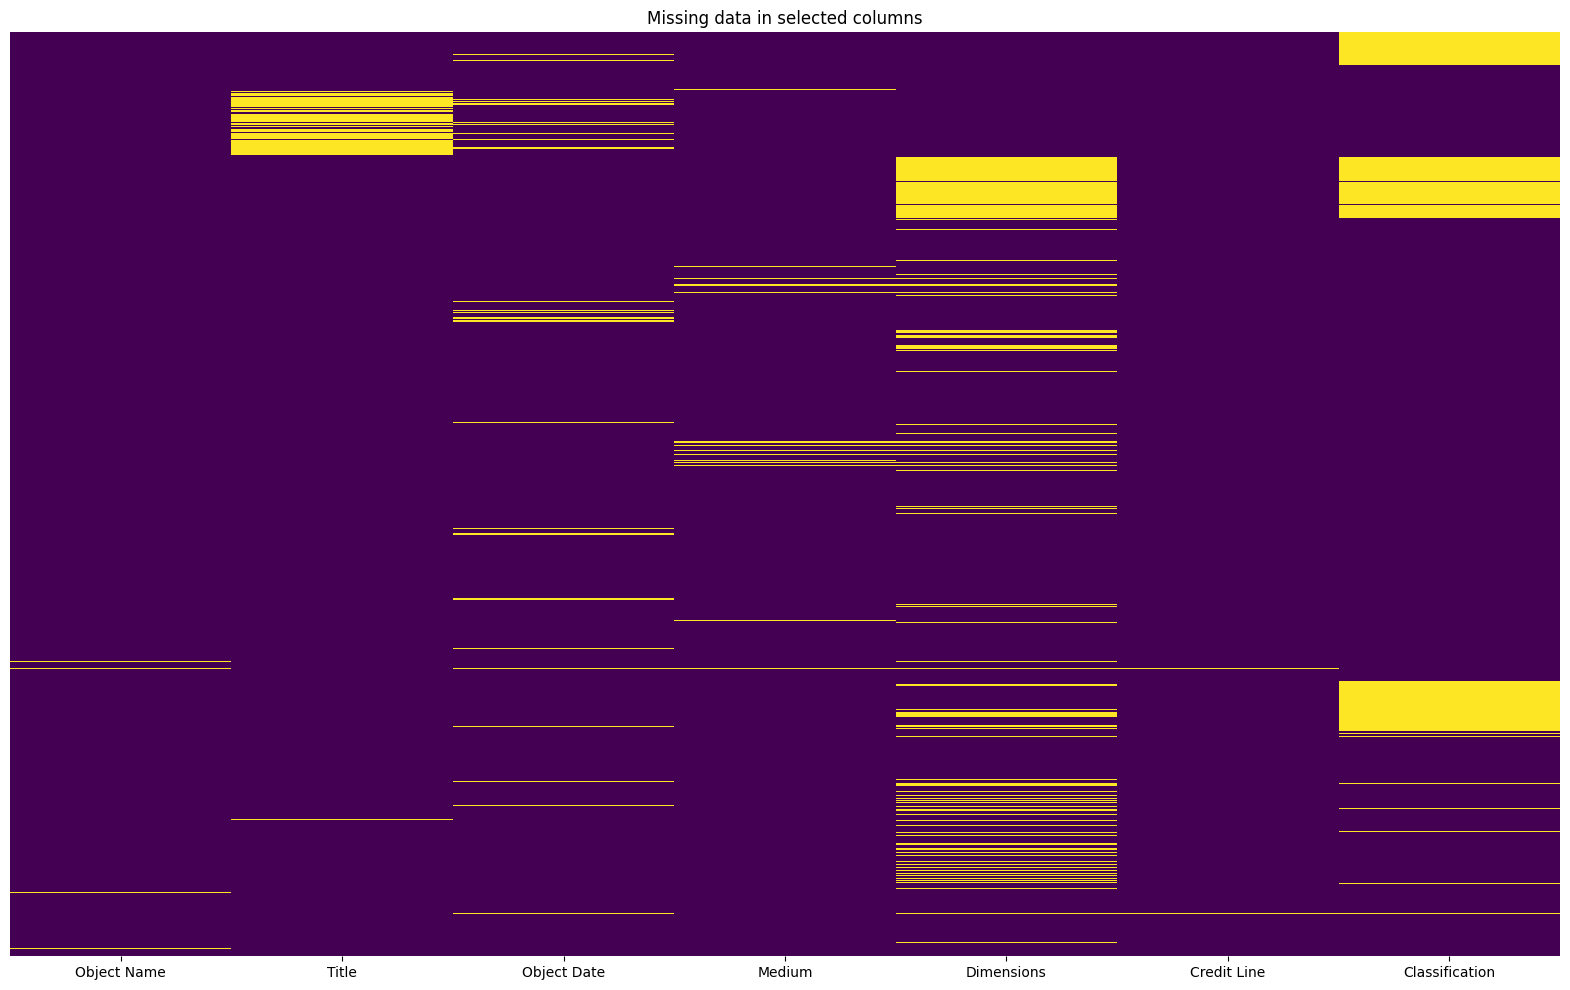

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Object Name', 'Title', 'Object Date', 'Medium', 'Dimensions', 'Credit Line', 'Classification']

for col in columns:
    print(f'Missing values in {col}: {met[col].isnull().sum()} ({met[col].isnull().mean()*100:.2f}%)')

# Visualize missing data
plt.figure(figsize=(20, 12))
sns.heatmap(met[columns].isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing data in selected columns')
plt.show()

The heatmap shows the missing data distribution across selected features. 'Credit Line' and 'Classification' have a substantial amount of missing data, with 'Dimensions' and 'Medium' also showing noticeable gaps. In contrast, 'Object Name' and 'Title' appear to have minimal missing values. This pattern suggests a need for imputation or handling missing data strategies.

Now I need to convert the features to a proper representation, if they're already not. I will check each feature data type and either convert to the appropriate one or leave it untouched.

In [38]:
columns = ['Object Name', 'Title', 'Object Date', 'Medium', 'Dimensions', 'Credit Line', 'Classification']
print(met[columns].dtypes)

Object Name       category
Title               object
Object Date         object
Medium              object
Dimensions          object
Credit Line         object
Classification      object
dtype: object


Overall, the data types look good, so we can start filling in the missing values. I want to look at the 'Classification' feature.

In [39]:
# Count of unique values
print(met['Classification'].nunique())

1244


In [40]:
print(met['Classification'].value_counts().head(20))

Classification
Prints                                  84326
Prints|Ephemera                         29148
Photographs                             27336
Drawings                                23062
Vases                                   21302
Books                                   14779
Ceramics                                11066
Textiles-Woven                          10970
Photographs|Ephemera                    10389
Paintings                                9005
Negatives                                6138
Glass                                    6134
Prints|Ornament & Architecture           5331
Drawings|Ornament & Architecture         5054
Textiles-Laces                           4957
Ceramics-Porcelain                       4396
Textiles-Embroidered                     4108
Metalwork-Silver                         3981
Ceramics-Pottery                         3708
Books|Prints|Ornament & Architecture     3687
Name: count, dtype: int64


I'm going to impute missing values in the “Classification” feature, because it contains enough missing values to apply some sophisticate model, but not too many to make any sense at all.

Since this is a kind of categorical feature, the usual trivial methods like filling in the mean or median will not work here; instead, I will create and train a machine learning model that will predict missing values in “Classification”. To impute missings, I will need to choose some features that are relevant to 'Classification' and don't contain missing values.

Based on the missing values percentage table above, I will use these features:
- **Department**: This feature is highly related to 'Classification' since museum departments (paintings/sculptures) are often organized by classification.
- **Medium**: The material used to create an object is usually tied to its classification (e.g., bronze for sculptures, oil on canvas for paintings).
- **Is Highlight**: Whether the object is a highlight could indirectly relate to classification, as important works tend to come from certain categories.
- **Gallery Number**: If certain galleries specialize in specific types of objects (e.g., Gallery A has sculptures, Gallery B has textiles), this feature could help identify the classification.

I will create a copy of the dataset where I will perform all operations. I will also categorize some features to train the model.

In [41]:
copy = met.copy()

In [42]:
copy['Medium standardized'] = copy['Medium standardized'].astype('category').cat.codes
copy['Is Highlight'] = copy['Is Highlight'].astype('category').cat.codes
copy['Department'] = copy['Department'].astype('category').cat.codes

In [43]:
# Separate data with known and missing classifications
df_known = copy.dropna(subset=['Classification'])
df_missing = copy[copy['Classification'].isnull()]

In [44]:
df_known.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Medium standardized
4843,10.125.583o,0,False,False,5209,774,8,1910,Curtain knob,Curtain knob,...,Metalwork-Brass,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q116392256,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8
4844,10.125.583p,0,False,False,5210,0,8,1910,Curtain knob,Curtain knob,...,Metalwork-Brass,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Eagles,http://vocab.getty.edu/page/aat/300250049,https://www.wikidata.org/wiki/Q2092297,8
7338,06.719,0,False,True,7829,0,8,1906,Spoon,Spoon,...,Metalwork-Pewter,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8
8710,1976.97,0,False,True,9367,774,12,1976,Vase,Vase,...,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q116393186,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1
12564,1984.331.25,0,False,True,13737,0,8,1984,Embroidered picture,Embroidered Picture,...,Textiles,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Flowers,http://vocab.getty.edu/page/aat/300132399,https://www.wikidata.org/wiki/Q506,17


In [45]:
df_missing.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Medium standardized
0,1979.486.1,0,False,False,1,0,16,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8
1,1980.264.5,0,False,False,2,0,16,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8
2,67.265.9,0,False,False,3,0,16,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8
3,67.265.10,0,False,False,4,0,16,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8
4,67.265.11,0,False,False,5,0,16,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8


In [46]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78717 entries, 0 to 484954
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Object Number            78717 non-null  object        
 1   Is Highlight             78717 non-null  int8          
 2   Is Timeline Work         78717 non-null  bool          
 3   Is Public Domain         78717 non-null  bool          
 4   Object ID                78717 non-null  int64         
 5   Gallery Number           78717 non-null  int64         
 6   Department               78717 non-null  int8          
 7   AccessionYear            78717 non-null  int64         
 8   Object Name              78116 non-null  category      
 9   Title                    78712 non-null  object        
 10  Culture                  48270 non-null  category      
 11  Period                   27976 non-null  object        
 12  Dynasty                  23201 non-n

Now let's prepare features and train the model. I selected Random Forest for my task, because it is robust, reduces overfitting by averaging multiple decision trees, and generally performs well on a variety of classification tasks due to its ability to handle both numerical and categorical features effectively.

In [47]:
# Prepare features
features = ['Department', 'Medium standardized', 'Is Highlight', 'Gallery Number']
X = df_known[features]
y = df_known['Classification']

In [48]:
# Encode target variable and save original categories
y_cat = pd.Categorical(y)
y_encoded = y_cat.codes
category_mapping = dict(enumerate(y_cat.categories)) # Save category mapping for decoding later

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test) # Model evaluation
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           2       0.00      0.00      0.00        32
           4       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         8
          23       0.00      0.00      0.00         6
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         1
          27       0.08      0.33      0.14        30
          28       0.00    

Overall, the model is trained and we can proceed to fill in the missing values.

In [52]:
# Prepare missing data for imputation
X_missing = df_missing[features]

In [53]:
# Impute missing values
imputed_classifications_codes = model.predict(X_missing)

In [54]:
# Convert codes back to original categories using saved category mapping
imputed_classifications = pd.Series(imputed_classifications_codes).map(category_mapping)

In [55]:
# Update original dataframe
copy.loc[copy['Classification'].isna(), 'Classification'] = imputed_classifications

In [56]:
copy.isnull().sum()

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number                  0
Department                      0
AccessionYear                   0
Object Name                  2266
Title                       28803
Culture                    276766
Period                     393813
Dynasty                    461755
Reign                      473720
Portfolio                  458442
Constituent ID             202443
Artist Role                202443
Artist Prefix              202443
Artist Display Name        202443
Artist Display Bio         204533
Artist Suffix              202491
Artist Alpha Sort          202443
Artist Nationality         202443
Artist Begin Date          202443
Artist End Date            202443
Artist Gender              378474
Artist ULAN URL            257515
Artist Wikidata URL        260754
Object Date                 13431
Object Begin D

There is a problem: not all missing values are filled in, and this may be because df_missing contains categories that were not in the training data, so the model cannot make accurate predictions for these rows. I will check if the missing data contains categories that were not in the training set.

In [57]:
for feature in features:
    print(set(X_missing[feature]) - set(X_train[feature]))

{16, 18, 4, 6}
set()
set()
{100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 703, 705, 707, 708, 712, 713, 714, 717, 719, 720, 721, 726, 727, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 747, 748, 750, 752, 754, 756, 758, 759, 760, 761, 763, 764, 766, 767, 768, 770, 771}


There are two features containing categories that are missing from the training set, which is causing the problem. I can handle these categories separately by identifying the rows in X_missing that contain unseen categories, predicting classifications for the remaining rows, and then filling in the Classification values for the unseen categories in a different way.

In [58]:
# Find unseen categories in 'Department' and 'Medium standardized'
unseen_department = set(X_missing['Department']) - set(X_train['Department'])
unseen_medium_standardized = set(X_missing['Medium standardized']) - set(X_train['Medium standardized'])

In [59]:
# Identify rows in X_missing with unseen categories
unseen_rows = X_missing[
    (X_missing['Department'].isin(unseen_department)) | 
    (X_missing['Medium standardized'].isin(unseen_medium_standardized))
]

In [60]:
seen_rows = X_missing[~X_missing.index.isin(unseen_rows.index)]

In [61]:
# Predict classifications for seen rows
# Impute known categories
imputed_classifications_codes = model.predict(seen_rows)

# Convert codes back to original categories
imputed_classifications = pd.Series(imputed_classifications_codes).map(category_mapping)

# Update original dataframe for seen categories
copy.loc[seen_rows.index, 'Classification'] = imputed_classifications

In [62]:
# Handle unseen categories
# Mode for 'Classification'
mode_classification = copy['Classification'].mode()[0]

# Update original dataframe for unseen categories
copy.loc[unseen_rows.index, 'Classification'] = mode_classification

In [63]:
# Check for remaining NaNs
print(copy.isnull().sum())

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number                  0
Department                      0
AccessionYear                   0
Object Name                  2266
Title                       28803
Culture                    276766
Period                     393813
Dynasty                    461755
Reign                      473720
Portfolio                  458442
Constituent ID             202443
Artist Role                202443
Artist Prefix              202443
Artist Display Name        202443
Artist Display Bio         204533
Artist Suffix              202491
Artist Alpha Sort          202443
Artist Nationality         202443
Artist Begin Date          202443
Artist End Date            202443
Artist Gender              378474
Artist ULAN URL            257515
Artist Wikidata URL        260754
Object Date                 13431
Object Begin D

There are still 30 NaNs remaining, but I may just fill them in with the “Unknown” category.

In [64]:
# Fill the remaining NaN values in 'Classification' with 'Unknown'
copy['Classification'] = copy['Classification'].fillna('Unknown')

In [65]:
# Check for remaining NaNs again
print(copy.isnull().sum())

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number                  0
Department                      0
AccessionYear                   0
Object Name                  2266
Title                       28803
Culture                    276766
Period                     393813
Dynasty                    461755
Reign                      473720
Portfolio                  458442
Constituent ID             202443
Artist Role                202443
Artist Prefix              202443
Artist Display Name        202443
Artist Display Bio         204533
Artist Suffix              202491
Artist Alpha Sort          202443
Artist Nationality         202443
Artist Begin Date          202443
Artist End Date            202443
Artist Gender              378474
Artist ULAN URL            257515
Artist Wikidata URL        260754
Object Date                 13431
Object Begin D

Finally, there are no missing values in the 'Classification' feature. We can move on to the last task.

## VIII. Dimensions extraction from the 'Dimensions' feature

The goal is to extract the length, width, height and diameter for each item in centimeters. This is a bit challenging because there is no consistent pattern/order in which the values go in this column. Let's take a look at what the values are in general.

In [66]:
print(met['Dimensions'].value_counts().head(10))

Dimensions
sheet: 2 11/16 x 1 3/8 in. (6.9 x 3.5 cm)    2297
Sheet: 2 3/4 x 1 1/2 in. (7 x 3.8 cm)        2278
Sheet: 2 1/2 × 1 7/16 in. (6.4 × 3.7 cm)     2141
Sheet: 2 3/4 × 1 1/2 in. (7 × 3.8 cm)        1966
35mm                                         1458
Sheet: 2 11/16 × 1 3/8 in. (6.8 × 3.5 cm)    1319
4 x 5 in.                                    1307
Sheet: 2 3/4 x 1 3/8 in. (7 x 3.5 cm)        1151
Approx. 3 1/2 × 7 in. (8.9 × 17.8 cm)         989
Sheet: 2 5/8 × 1 1/2 in. (6.7 × 3.8 cm)       921
Name: count, dtype: int64


As usual, I will convert all values to lowercase.

In [67]:
met['Dimensions'] = met['Dimensions'].str.lower()

In [68]:
print(met['Dimensions'].value_counts().head(10))

Dimensions
sheet: 2 3/4 x 1 1/2 in. (7 x 3.8 cm)        2328
sheet: 2 11/16 x 1 3/8 in. (6.9 x 3.5 cm)    2297
sheet: 2 1/2 × 1 7/16 in. (6.4 × 3.7 cm)     2141
sheet: 2 3/4 × 1 1/2 in. (7 × 3.8 cm)        1966
35mm                                         1458
sheet: 2 11/16 × 1 3/8 in. (6.8 × 3.5 cm)    1319
4 x 5 in.                                    1307
sheet: 2 3/4 x 1 3/8 in. (7 x 3.5 cm)        1151
approx. 3 1/2 × 7 in. (8.9 × 17.8 cm)         989
sheet: 2 5/8 × 1 1/2 in. (6.7 × 3.8 cm)       921
Name: count, dtype: int64


We can see that this has improved the situation with the number of unique values, but it doesn't matter in our case. I will extract the values through regular expressions. For this purpose I will create 4 new columns length_cm, width_cm, height_cm and diameter_cm.

In [69]:
import re

def extractdimensions(dimension_str):
    if pd.isna(dimension_str) or dimension_str in ['Dimensions unavailable', 'Dimensions unrecorded', 'Various dimensions']:
        return pd.Series({'length_cm': None, 'width_cm': None, 'height_cm': None, 'diameter_cm': None})

    # First, check for diameter (2 cases: cm/inch in parentheses)
    diameter = re.search(r'(?:diam\.|d\.)\s*(?:(?:\d+(?:/\d+)?)|(?:\d+\s+\d+/\d+))?\s*in\.\s*\((\d+(?:\.\d+)?)\s*cm\)', dimension_str)
    diameter2 = re.search(r'(?:diam\.|d\.)\s*(\d+(?:\.\d+)?)\s*cm\s*\(\s*(\d+(?:\s+\d+/\d+)?)\s*in\.\s*\)', dimension_str)

    if diameter:
        return pd.Series({'length_cm': None, 'width_cm': None, 'height_cm': None, 'diameter_cm': diameter.group(1)})

    # Pattern for L x W x H dimensions
    pattern = r'(\d+(?:\s+\d+/\d+)?|\d+/\d+)\s*x\s*(\d+(?:\s+\d+/\d+)?|\d+/\d+)\s*(?:x\s*(\d+(?:\s+\d+/\d+)?|\d+/\d+))?\s*in\.\s*\((\d+\.?\d*)\s*x\s*(\d+\.?\d*)\s*(?:x\s*(\d+\.?\d*))?\s*cm\)'
    match = re.search(pattern, dimension_str)
    
    if match:
        length_cm = match.group(4)
        width_cm = match.group(5)
        height_cm = match.group(6) if match.group(6) else None
        return pd.Series({'length_cm': length_cm, 'width_cm': width_cm, 'height_cm': height_cm, 'diameter_cm': None})
    
    #If no x-separated measurements, look for specific dimension types (again, 2 cases for each dimension)
    height = re.search(r'h\.\s*(?:\d+(?:\s+\d+/\d+)?\s*in\.\s*\()?([\d.]+)\s*cm\)?|h\.\s*\d+(?:\s+\d+/\d+)?\s*in\.', dimension_str)
    height2 = re.search(r'h\.\s*(\d+(?:\.\d+)?)\s*cm\s*\(\s*(\d+(?:\s+\d+/\d+)?)\s*in\.\s*\)', dimension_str)

    if height:
        return pd.Series({'length_cm': None, 'width_cm': None, 'height_cm': height.group(1), 'diameter_cm': None})

    width = re.search(r'w\.\s*(?:\d+(?:\s+\d+/\d+)?\s*in\.\s*\()?([\d.]+)\s*cm\)?|h\.\s*\d+(?:\s+\d+/\d+)?\s*in\.', dimension_str)
    width2 = re.search(r'w\.\s*(\d+(?:\.\d+)?)\s*cm\s*\(\s*(\d+(?:\s+\d+/\d+)?)\s*in\.\s*\)', dimension_str)
    
    if width:
        return pd.Series({'length_cm': None, 'width_cm': width.group(1), 'height_cm': None, 'diameter_cm': None})

    length = re.search(r'l\.\s*(?:\d+(?:\s+\d+/\d+)?\s*in\.\s*\()?([\d.]+)\s*cm\)?|h\.\s*\d+(?:\s+\d+/\d+)?\s*in\.', dimension_str)
    length2 = re.search(r'l\.\s*(\d+(?:\.\d+)?)\s*cm\s*\(\s*(\d+(?:\s+\d+/\d+)?)\s*in\.\s*\)', dimension_str)
    
    if length:
        return pd.Series({'length_cm': length.group(1), 'width_cm': None, 'height_cm': None, 'diameter_cm': None})

    # If no match found, return None for all dimensions
    return pd.Series({'length_cm': None, 'width_cm': None, 'height_cm': None, 'diameter_cm': None})

In [70]:
met[['length_cm', 'width_cm', 'height_cm', 'diameter_cm']] = met['Dimensions'].apply(extractdimensions)

In [71]:
print(met[['Dimensions', 'length_cm', 'width_cm', 'height_cm', 'diameter_cm']].head(20))

                  Dimensions length_cm width_cm height_cm diameter_cm
0     dimensions unavailable      None     None      None        None
1     dimensions unavailable      None     None      None        None
2   diam. 11/16 in. (1.7 cm)      None     None      None         1.7
3   diam. 11/16 in. (1.7 cm)      None     None      None         1.7
4   diam. 11/16 in. (1.7 cm)      None     None      None         1.7
5   diam. 11/16 in. (1.7 cm)      None     None      None         1.7
6   diam. 11/16 in. (1.7 cm)      None     None      None         1.7
7   diam. 11/16 in. (1.7 cm)      None     None      None         1.7
8   diam. 11/16 in. (1.7 cm)      None     None      None         1.7
9     dimensions unavailable      None     None      None        None
10    dimensions unavailable      None     None      None        None
11    dimensions unavailable      None     None      None        None
12    dimensions unavailable      None     None      None        None
13    dimensions una

In the first 20 lines we can only check the diameter, but that already looks good. Now we can take a random sample of 10 lines to check how well the function worked.

In [72]:
met[['Dimensions', 'length_cm', 'width_cm', 'height_cm', 'diameter_cm']].sample(n=10, random_state=43)

,Dimensions,length_cm,width_cm,height_cm,diameter_cm
249662,overall: 21 1/16 x 16 x 7/8 in. (53.5 x 40.7 x...,53.5,40.7,2.3,None
337041,"h. 10.4 cm, diam. 4.9 cm, wt. 235 g",None,None,10.4,None
324607,"h. 6-3/4, w. 5-1/4 inches\r\n(17.1 x 13.3 cm.)...",None,None,None,None
280403,image: 10 1/2 x 7 1/8 in. (26.6 x 18.1 cm)\r\n...,26.6,18.1,None,None
131953,l. 2 3/4 x w. 2 1/4 inches\r\n7 x 5.7 cm,None,None,None,None
227049,sheet: 11 1/16 x 19 7/16 in. (28.1 x 49.4 cm),28.1,49.4,None,None
324174,30 x 44 in. (76.2 x 111.8 cm),76.2,111.8,None,None
379048,sheet: 2 11/16 × 1 3/8 in. (6.8 × 3.5 cm),None,None,None,None
480069,sheet: 2 9/16 × 1 7/16 in. (6.5 × 3.7 cm),None,None,None,None
20328,l. 6 3/4 in. (17.2 cm); wt. 7 oz. (198 g),17.2,None,None,None


For clarity, I will still write out a piece of dataset where the dimensions are given as L x W x H.

In [73]:
met.loc[75:90, ['Dimensions', 'length_cm', 'width_cm', 'height_cm', 'diameter_cm']]

,Dimensions,length_cm,width_cm,height_cm,diameter_cm
75,16 1/8 x 15 1/4 x 8 1/8 in. (41 x 38.7 x 20.6 cm),41,38.7,20.6,None
76,16 1/8 x 15 1/4 x 8 1/8 in. (41 x 38.7 x 20.6 cm),41,38.7,20.6,None
77,19 1/4 x 19 1/2 x 11 3/4 in. (48.9 x 49.5 x 29...,48.9,49.5,29.8,None
78,19 1/4 x 19 1/2 x 11 3/4 in. (48.9 x 49.5 x 29...,48.9,49.5,29.8,None
79,20 3/4 x 19 1/2 x 11 3/4 in. (52.7 x 49.5 x 29...,52.7,49.5,29.8,None
80,20 3/4 x 19 1/2 x 11 3/4 in. (52.7 x 49.5 x 29...,52.7,49.5,29.8,None
81,18 3/4 x 17 in. (47.6 x 43.2 cm),47.6,43.2,None,None
82,18 3/4 x 17 in. (47.6 x 43.2 cm),47.6,43.2,None,None
83,23 1/4 x 23 1/2 in. (59.1 x 59.7 cm),59.1,59.7,None,None
84,23 1/4 x 23 1/2 in. (59.1 x 59.7 cm),59.1,59.7,None,None


Overall, this looks good, work on the project can end here.